In [1]:
#linear algebra
import numpy as np 
import math

#data tools
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 

#plots
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn')

In [2]:
data = dataset=pd.read_csv("data/part1_set02.txt",sep=" ", header=None)
data.columns = ['rent','HPI']
data = data.drop(0)
data.reset_index(drop=True)
data[["rent", "HPI"]] = data[["rent", "HPI"]].apply(pd.to_numeric)


## **1. Verify distribution of sample**

Perform Shapiro-Wilk test to check if data is normally distributed  
**Null hypothesis**: Data is normally distributed   
**Alternative hypothesis**: Data is not normally distributed    



In [3]:
rent = data['rent']
hpi = data['HPI']

In [4]:
stat, p_val = stats.shapiro(rent)
stat, p_val

(0.9345635771751404, 0.06498558819293976)

### **Rent**    
According to table https://www.real-statistics.com/statistics-tables/shapiro-wilk-table/    
**n**= 30 for **p**= 0.05 **W**= 0.927   
Given:  
p_val (0.06498558819293976) > alfa (0.05)   
W_test (0.9345635771751404) > W (0.927)  
**We fail to reject null hypothesis We can assume that data is normally distributed**


In [5]:
stat, p_val = stats.shapiro(hpi)
stat, p_val

(0.9355310797691345, 0.06898201256990433)

## **HPI**
According to table https://www.real-statistics.com/statistics-tables/shapiro-wilk-table/    
**n** = 30 for **p** = 0.05 **W** = 0.927   
Given:  
pval (0.06898201256990433) > alfa (0.05)    
W_test (0.9355310797691345) > W (0.927)    
**We fail to reject null hypothesis We can assume that data is normally distributed**   

## **2. Scatter plot**



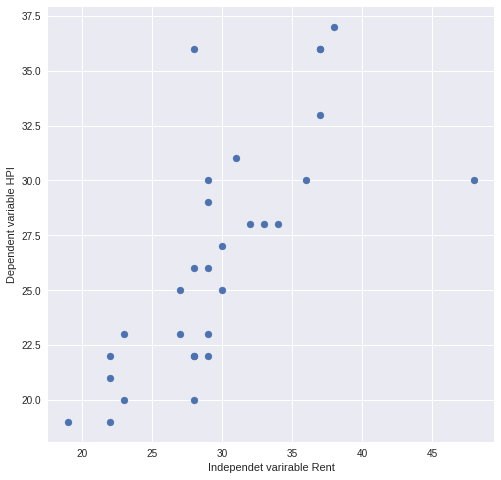

In [6]:
plt.figure(figsize=(8,8))
plt.scatter(x=rent, y=hpi, )
plt.xlabel('Independet varirable Rent')
plt.ylabel('Dependent variable HPI')
plt.show()

Scatter plot shows positive linear correlation between values   
Looking at the plot we could also observe probably existing outliers

## **3. Correlation**

In [7]:
data.corr(method='pearson')

,rent,HPI
rent,1.00000,0.72991
HPI,0.72991,1.00000


In [8]:
data.corr(method='spearman')

,rent,HPI
rent,1.000000,0.812327
HPI,0.812327,1.000000


**Testing for correlation coefficient**     
As from previous test on values we did assumed that our data    
did came from normal distribution, so we are able to    
calculate pearson correlation coefficients for testing non-correlation  

**Null hypothesis**: p = 0 (two variables are NOT correlated)   
**Alternative hypothesis**: p != 0 (two variables are correlated)

In [9]:
corr, p_val = stats.pearsonr(rent, hpi)
corr, p_val

(0.7299101363368404, 4.70685361950623e-06)

In [10]:
def ttest(r,n):
  tval = r * math.sqrt((n-2)/(1-r**2))
  return tval

In [11]:
ttest(0.7299101363368404, 30)

5.650442969841911

**Pearson Correlation testing**     
t_statistics for **n** = 30, **alpha** = 0.05
**t** = 2.042   
**t_test** (5.650442969841911) > 2.042      
**p_val** (4.70685361950623e-06) < 0.05     


t value did exceed the critical value for alpha (0.05), we can reject   
the null hypothesis and accept the alternative hypothesis.  
Also according to the p_val we can reject the null hypothesis and assume that two variables are correlated. 


In [12]:
stats.spearmanr(rent, hpi)

SpearmanrResult(correlation=0.8123268723002774, pvalue=5.017749306985238e-08)

In [13]:
ttest(0.812327, 30)

7.37039435752581

**Spearman rank correlation testing**   
t statistics for **n** = 30, **alpha** = 0.05 (for n > 20 it can be described by the Student's t distribution with n-2 degrees of freedom)  
**t** = 4.303   
**t_test** (7.37039435752581) > 4.303
**p_val** (5.017749306985238e-08) < 0.05    
t value did exceed the critical value for alpha (0.05), we can reject the null      
hypothesis and accept the alternative hypothesis and assume that two variables are correlated.      
Also according to the p_val we can reject the null hypothesis.


## **4.Comment on scatter plot and correlation coeffeicients**
According to the scatter plot we can see that there is positive correlation. It looks like there could be some  outliers as well. When calculating pearson correlation the result gives r = 0.7299 which can be described as large  positive correlation. Calculating spearman correlation gives r = 0.8123.       
Pearson correlation focuses on linear dependency between values and our calculations show large positive correlation.    Spearman correlation assesses monotonic relationship. Given the result of spearman correlation it's large so we    can say that observations have a similar rank. As a final conclusion it means, that when one variable increases, the other one increases as well, but the amount is not consistent  


## **5. Linear regression** 

In [14]:
reg1 = smf.ols('hpi ~  rent', data=data).fit()
print (reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                    hpi   R-squared:                       0.533
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     31.93
Date:                Mon, 23 Nov 2020   Prob (F-statistic):           4.71e-06
Time:                        12:20:18   Log-Likelihood:                -81.197
No. Observations:                  30   AIC:                             166.4
Df Residuals:                      28   BIC:                             169.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1257      3.508      2.031      0.0

**According to model summary**: 

Coefficients for intercept: 7.1257, rent: 0.6531    
It means that hpi increases by about 0.6531 with each one unit of increase of rent  

**Testing beta coefficients**   
**Null hypothesis**: Beta1 = Beta1.0    
**Alternative hypothesis**: Beta1 != Beta1.0    
**t**: 5.650 **p_val**: 0.000 **alpha**: 0.05   
p_val < alpha   
Given these results we reject the null hypothesis and we can assume     
that the regression line differs significantly from zero.   
We conclude that there is a significant relationship between the independent and dependent variable

**F-test**  
**Null hypothesis**: Beta0 = Beta1 = 0  
**Alternative hypothesis**: Beta0 != 0 or Beta1 != 0    

**alpha**: 0.05     
**F-statistics**: 31.93     
**p_val**: 4.71e-06     
p_val < alpha       
Given this we can reject the null hypothesis and assume that our model fits data better than the intercept-only model

## **6. 95% confidence interval**

In [15]:
y_pred = data['rent']
y_pred = sm.add_constant(y_pred)

In [16]:
predictions = reg1.get_prediction(y_pred)
results = predictions.summary_frame(alpha=0.05)

In [17]:
conf_int = predictions.conf_int()

In [18]:
up = np.poly1d(np.polyfit(rent, conf_int[:,1], 4))(np.unique(rent))
down = np.poly1d(np.polyfit(rent, conf_int[:,0], 4))(np.unique(rent))

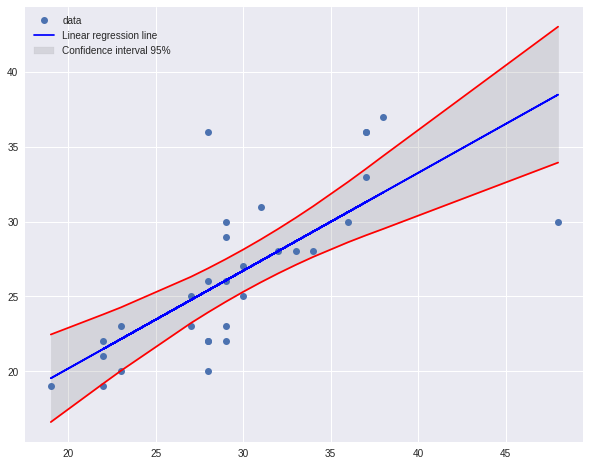

In [19]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(rent, hpi, 'o', label="data")
ax.plot(rent, reg1.fittedvalues, 'b-', label="Linear regression line")
ax.plot(np.unique(rent), np.poly1d(np.polyfit(rent, conf_int[:,1], 4))(np.unique(rent)), 'r')
ax.plot(np.unique(rent), np.poly1d(np.polyfit(rent, conf_int[:,0], 4))(np.unique(rent)), 'r')
ax.fill_between(np.unique(rent), up, down, color='grey',alpha=0.2, label="Confidence interval 95%")
ax.legend(loc='best');

We can clearly see that there are some outliers and influence points which are not inside the 95% confidence interval and are affecting our model. It will be worth investigating the residual chart to get more valuable information.

## **7. Coefficient of determination**

In [20]:
reg1.rsquared_adj

0.5160819788103812

Degree to which linear relationship between independent and     
dependent variable explains the variability of the  scatter plot equals: 0.516      
We can conclude that around 52% of our data fit the regression model

## **8. Residual chart**

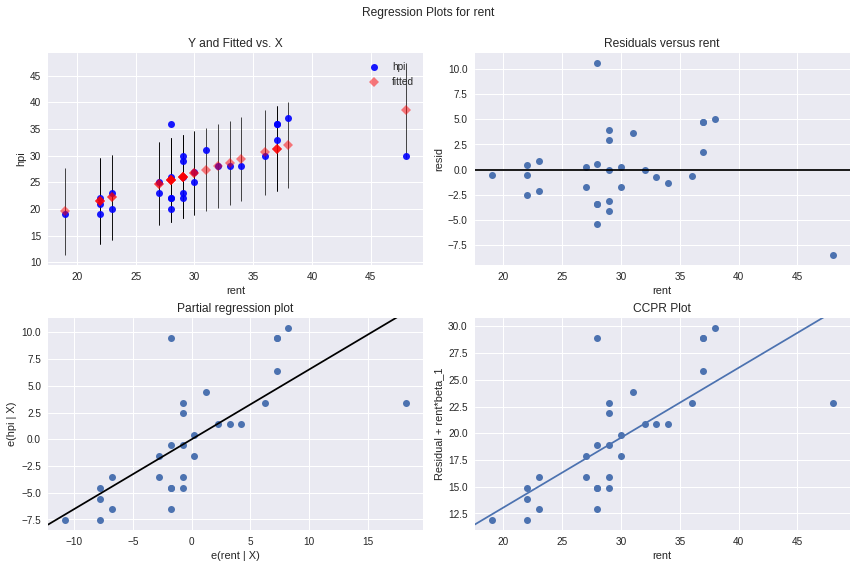

In [21]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(reg1, 'rent', fig=fig) 


By looking at the residual chart we can see that there's no obvious pattern, but it forms a "fun-like shape", as    further the regression line, there are occuring points with bigger errors than at the beginning. Also we can clearly    see points which can be marked as outliers and one point which is much further from other and it can be classified  as an influence variable.

## **9. Conclusions**

As an conclusion we can state that variable **rent** explain/affect variable **hpi (House Price Index)** in some ways. If we are hoping for good results of our model we should consider removing outliers and influence variables. According to obtained coefficient of determination we could conclude that probably there is more variables/data which also describe our target variable. Extending our dataset, by adding other features could improve our regression model.